<a href="https://colab.research.google.com/github/mefy-Aruna/DIABETES_NEW/blob/main/Data5_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r'data5.csv')


In [ ]:

# Import our libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import seaborn as sns
sns.set(style="ticks")

In [ ]:
x = df.iloc[:, 0:14].values
y = df.iloc[:, 14].values
x

array([[193.  ,  77.  ,  49.  , ...,  32.  ,  38.  ,   0.84],
       [146.  ,  79.  ,  41.  , ...,  33.  ,  40.  ,   0.83],
       [217.  ,  75.  ,  54.  , ...,  40.  ,  45.  ,   0.89],
       ...,
       [301.  ,  90.  , 118.  , ...,  31.  ,  41.  ,   0.76],
       [232.  , 184.  , 114.  , ...,  35.  ,  38.  ,   0.92],
       [165.  ,  94.  ,  69.  , ...,  51.  ,  51.  ,   1.  ]])

In [ ]:
x = df.iloc[:, :-1].values
x


array([[193.  ,  77.  ,  49.  , ...,  32.  ,  38.  ,   0.84],
       [146.  ,  79.  ,  41.  , ...,  33.  ,  40.  ,   0.83],
       [217.  ,  75.  ,  54.  , ...,  40.  ,  45.  ,   0.89],
       ...,
       [301.  ,  90.  , 118.  , ...,  31.  ,  41.  ,   0.76],
       [232.  , 184.  , 114.  , ...,  35.  ,  38.  ,   0.92],
       [165.  ,  94.  ,  69.  , ...,  51.  ,  51.  ,   1.  ]])

In [ ]:
acc=0

In [ ]:
# Train Test Split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split


In [ ]:

while acc<0.95:
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
# Preprocessing
########################## try without splitting the data

  from sklearn.preprocessing import StandardScaler
  scaler = StandardScaler()
  scaler.fit(x_train)

  x_train = scaler.transform(x_train)
  x_test = scaler.transform(x_test)
  from sklearn.ensemble import RandomForestClassifier
  RFclassifier = RandomForestClassifier(n_estimators = 200,random_state=0,warm_start=True)
  RFclassifier.fit(x_train, y_train)
  y_pred = RFclassifier.predict(x_test)
  #print(confusion_matrix(y_test, y_pred))
  print(classification_report(y_test, y_pred))
  acc=accuracy_score(y_test, y_pred)
  print(acc)




              precision    recall  f1-score   support

           0       0.91      0.97      0.94        66
           1       0.75      0.50      0.60        12

    accuracy                           0.90        78
   macro avg       0.83      0.73      0.77        78
weighted avg       0.89      0.90      0.89        78

0.8974358974358975
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        61
           1       0.79      0.65      0.71        17

    accuracy                           0.88        78
   macro avg       0.85      0.80      0.82        78
weighted avg       0.88      0.88      0.88        78

0.8846153846153846
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        66
           1       0.67      0.50      0.57        12

    accuracy                           0.88        78
   macro avg       0.79      0.73      0.75        78
weighted avg       0.88      0.88   

In [ ]:
label =[ 'Cholesterol','Glucose','HDL Chol','Chol/HDL ratio','Age','Gender','Height','Weight','BMI','Systolic BP','Diastolic BP','Waist','Hip','Waist/Hip ratio']


FEATURE SELECTION


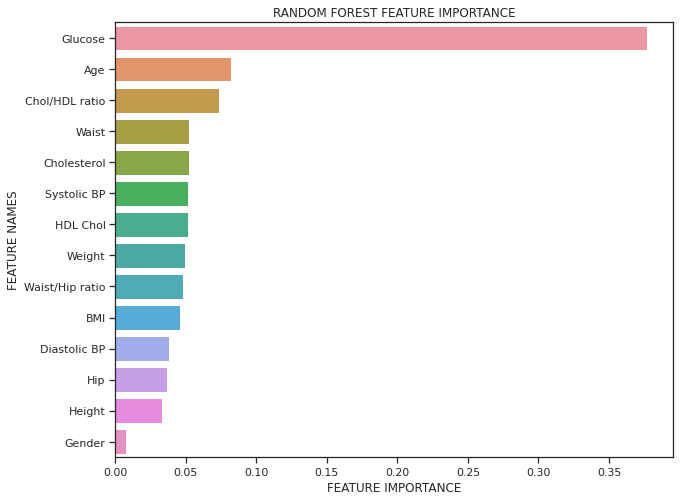

In [ ]:
def plot_feature_importance(importance,names,model_type):
  feature_importance = np.array(importance)
  feature_names = np.array(names)

#Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

#Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
  #Define size of bar plot
  plt.figure(figsize=(10,8))
#Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
#Add chart labels
  plt.title(model_type + ' FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')
plot_feature_importance(RFclassifier.feature_importances_,label,'RANDOM FOREST')


In [ ]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(0.05))

x_train_dup=x_train
sel.fit_transform(x_train_dup)

array([[-0.08419461, -0.30039946,  0.0802802 , ..., -0.32211031,
        -0.36579722,  0.0142588 ],
       [-1.38659323, -0.46783132, -1.28486372, ..., -1.18401784,
        -0.88299692, -0.79460407],
       [-0.08419461,  3.58774032, -0.39455246, ...,  1.74646775,
         2.04780137, -0.12055168],
       ...,
       [-0.39323835, -0.18877823, -0.15713613, ...,  0.0226527 ,
         0.32380237, -0.52498311],
       [-1.36451868, -0.39341716, -1.22550963, ..., -1.18401784,
        -1.40019662,  0.14906928],
       [-1.5852642 , -0.33760654, -0.15713613, ..., -1.18401784,
        -0.71059702, -1.1990355 ]])

In [ ]:

RFclassifier = RandomForestClassifier(n_estimators = 100,random_state=0,warm_start=True)
RFclassifier.fit(x_train_dup, y_train)
y_pred = RFclassifier.predict(x_test)
print(classification_report(y_test, y_pred))
acc=accuracy_score(y_test, y_pred)
print(acc)




              precision    recall  f1-score   support

           0       0.98      0.98      0.98        65
           1       0.92      0.92      0.92        13

    accuracy                           0.97        78
   macro avg       0.95      0.95      0.95        78
weighted avg       0.97      0.97      0.97        78

0.9743589743589743


FEATURE SELECTION: METHOD 2


In [ ]:
labelProb =RFclassifier.predict_proba(x_test)



In [ ]:
alpha=0.75
beta=0.4

finalProb=[]
finalLabelProb=[]
#labelProbList=labelProb.tolist()


In [ ]:
for i in labelProb:
 # print("list: i is:",i)
  if i[1] > alpha and i[1]> i[0]:
    ele =i[1]
   # print("positive")
    add=1
    finalProb.append(add)
    finalLabelProb.append(add)

  elif i[0]>beta and i[0]>i[1]:
   # print("negative")
    add=0
    finalProb.append(add)
    finalLabelProb.append(add)
  else:
    #print("abstention incurred")
    add=2
    ##remove prob with target as 2
    finalProb.append(add)
    
  


  


In [ ]:
index=[]
for i, e in enumerate(finalProb):
   if e == 2:
     
     index.append(i)
  
print(index)


[19, 20, 25, 27, 35, 41, 49, 64, 75]


In [ ]:
y_test_dup=y_test
y_test_dup=y_test_dup.tolist()
final_y_test = [i for j, i in enumerate(y_test_dup) if j not in index]


#for pos in index:
  #print(pos)

####use anotehr variable to pop as this is removing and using the same list to remove again and hence th error
  #y_test_final=y_test_dup.pop(pos)

# RESULT

In [ ]:

#print(confusion_matrix(y_test, y_pred))
#print(classification_report(y_test, y_pred))
print(accuracy_score(final_y_test, finalLabelProb)) 

0.9855072463768116


In [ ]:

import pickle
filename = 'diabetesClassifier.pkl'
pickle.dump(RFclassifier, open(filename, 'wb'))

In [ ]:
#ROC curves
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, labelProb[:,1])
sensitivity = tpr #alpha
specificity= 1-fpr #beta

In [ ]:
sensitivity

array([0.        , 0.07692308, 0.69230769, 0.69230769, 0.92307692,
       0.92307692, 0.92307692, 0.92307692, 0.92307692, 0.92307692,
       0.92307692, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [ ]:
specificity

array([1.        , 1.        , 1.        , 0.98461538, 0.98461538,
       0.89230769, 0.83076923, 0.81538462, 0.75384615, 0.69230769,
       0.63076923, 0.58461538, 0.53846154, 0.52307692, 0.46153846,
       0.38461538, 0.33846154, 0.26153846, 0.16923077, 0.        ])

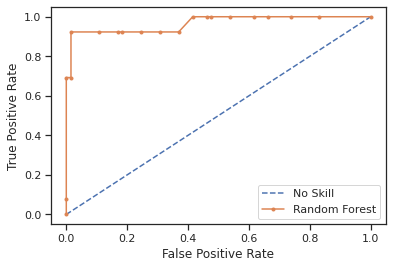

In [ ]:
# plot the roc curve for the model
from matplotlib import pyplot

pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Random Forest')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))

In [ ]:
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

Best Threshold=0.530000, G-Mean=0.953


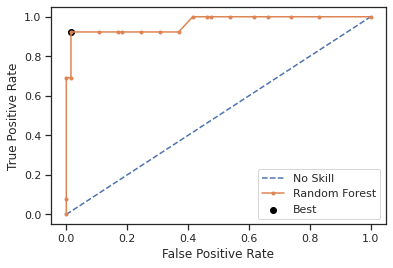

In [ ]:
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Random Forest')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:

from sklearn.metrics import roc_auc_score
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, finalProb)
# get the best threshold
J = tpr - fpr
ix = np.argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))
ns_probs = [0 for _ in range(len(final_y_test))]

score=roc_auc_score(final_y_test,ns_probs)
lr_probs = RFclassifier.predict_proba(x_test)


lr_auc = roc_auc_score(y_test, lr_probs)
# predict probabilities
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
print(lr_probs)
score


Best Threshold=1.000000


ValueError: ignored

Best Threshold=1.000000, F-Score=0.889


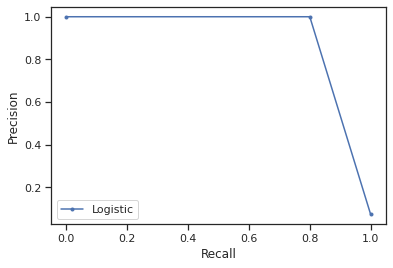

In [ ]:
# calculate roc curves
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(final_y_test, finalLabelProb)
# convert to f score
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
# plot the roc curve for the model
#no_skill = len(final_y_test[final_y_test==1]) / len(final_y_test)
#pyplot.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
pyplot.plot(recall, precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
pip install streamlit

     |████████████████████████████████| 7.4MB 2.6MB/s 
     |████████████████████████████████| 133kB 39.8MB/s 
     |████████████████████████████████| 163kB 42.9MB/s 
     |████████████████████████████████| 6.7MB 41.5MB/s 
     |████████████████████████████████| 4.4MB 36.6MB/s 
     |████████████████████████████████| 102kB 8.9MB/s 
     |████████████████████████████████| 112kB 46.1MB/s 
     |████████████████████████████████| 71kB 7.3MB/s 
     |████████████████████████████████| 71kB 7.0MB/s 
     |████████████████████████████████| 122kB 46.9MB/s 
  Created wheel for watchdog: filename=watchdog-0.10.3-cp36-none-any.whl size=73873 sha256=b1bc8dc791b8c9a1379404142c6f3d1717b162572d15e7a477c11a1c73849fa6
  Stored in directory: /root/.cache/pip/wheels/a8/1d/38/2c19bb311f67cc7b4d07a2ec5ea36ab1a0a0ea50db994a5bc7
  Created wheel for blinker: filename=blinker-1.4-cp36-none-any.whl size=13450 sha256=e016297929ddcc3b915e16a27fdb2652a17dc00bf098aa923dc216ec08bfae8f
  Stored in directory: /root/.ca

In [51]:
import numpy as np
import pickle
import pandas as pd
import streamlit as st 


ContextualVersionConflict: ignored

In [ ]:
pickle_in = open("bestClassifier.pkl","rb")
classifier=pickle.load(pickle_in)

FileNotFoundError: ignored

In [ ]:
def welcome():
    return "Welcome All"

In [ ]:
def predict_note_authentication(SESSO, AGE, WBC, Piastrine, Neutrofili, Monociti, Eosinofili, Basofili, AST, ALT, ALP, GGT, LDH):
    
    """Let's Authenticate the Banks Note 
    This is using docstrings for specifications.
    ---
    parameters:  
      - name: SESSO
        in: query
        type: number
        required: true
      - name: AGE
        in: query
        type: number
        required: true
      - name: WBC
        in: query
        type: number
        required: true
      - name: Piastrine
        in: query
        type: number
        required: true
      - name: Neutrofili
        in: query
        type: number
        required: true
      - name: Monociti
        in: query
        type: number
        required: true
      - name: Eosinofili
        in: query
        type: number
        required: true
      - name: Basofili
        in: query
        type: number
        required: true
      - name: AST
        in: query
        type: number
        required: true
      - name: ALT
        in: query
        type: number
        required: true
      - name: ALP
        in: query
        type: number
        required: true
      - name: GGT
        in: query
        type: number
        required: true
      - name: LDH
        in: query
        type: number
        required: true
    responses:
        200:
            description: The output values
        
    """
   
    prediction=classifier.predict([[SESSO, AGE, WBC, Piastrine, Neutrofili, Monociti, Eosinofili, Basofili, AST, ALT, ALP, GGT, LDH]])
    print(prediction)
    return prediction

In [ ]:
def main():
    st.title("Covid'19")
    html_temp = """
    <div style="background-color:tomato;padding:10px">
    <h2 style="color:white;text-align:center;">Covid'19 </h2>
    </div>
    """
    st.markdown(html_temp,unsafe_allow_html=True)
    SESSO = st.text_input("Gender (For Male type: 0 / For Female type: 1)","Type Here")
    AGE = st.text_input("AGE","Type Here")
    WBC = st.text_input("WBC","Type Here")
    Piastrine = st.text_input("Piastrine","Type Here")
    Neutrofili = st.text_input("Neutrofili","Type Here")
    Monociti = st.text_input("Monociti","Type Here")
    Eosinofili = st.text_input("Eosinofili","Type Here")
    Basofili = st.text_input("Basofili","Type Here")
    AST = st.text_input("AST","Type Here")
    ALT = st.text_input("ALT","Type Here")
    ALP = st.text_input("ALP","Type Here")
    GGT = st.text_input("GGT","Type Here")
    LDH = st.text_input("LDH","Type Here")

    result=""
    if st.button("Predict"):
        result=predict_note_authentication(SESSO, AGE, WBC, Piastrine, Neutrofili, Monociti, Eosinofili, Basofili, AST, ALT, ALP, GGT, LDH)
    st.success('The output is  {}'.format(result))
    if st.button("About"):
        st.text("Coronavirus disease (COVID-19) is an infectious disease caused by a newly discovered coronavirus.")
        st.text("Most people who fall sick with COVID-19 will experience mild to moderate symptoms and recover without special treatment.")

if __name__=='__main__':
    main()
    

In [ ]:
import keras
# from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout
from keras import backend as K
from keras.callbacks import LearningRateScheduler
from keras.callbacks import History
# from keras.callbacks import 

In [ ]:
# Train Test Split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)
# Preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
classifier = Sequential()

In [ ]:
classifier.add(Dense(units = 7,kernel_initializer='uniform', activation = 'relu',input_dim = 14))
classifier.add(Dense(units = 7,kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 3,kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 3,kernel_initializer = 'uniform', activation = 'relu'))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'softmax'))
# Compiling the ANN
opt = keras.optimizers.Adam(learning_rate=0.01)
classifier.compile(optimizer=opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])
# Fitting the ANN to the Training set
model_history=classifier.fit(x_train, y_train,validation_split=0.20, batch_size = 5, epochs = 1000)


Epoch 1/1000
36/36 [==============================] - 0s 7ms/step - loss: 0.0000e+00 - accuracy: 0.6554 - val_loss: 0.0000e+00 - val_accuracy: 0.5778
Epoch 2/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.6554 - val_loss: 0.0000e+00 - val_accuracy: 0.5778
Epoch 3/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.6554 - val_loss: 0.0000e+00 - val_accuracy: 0.5778
Epoch 4/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.6554 - val_loss: 0.0000e+00 - val_accuracy: 0.5778
Epoch 5/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.6554 - val_loss: 0.0000e+00 - val_accuracy: 0.5778
Epoch 6/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.6554 - val_loss: 0.0000e+00 - val_accuracy: 0.5778
Epoch 7/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.6

In [ ]:
    from keras import regularizers
    from keras.layers import Dense, Dropout, BatchNormalization
    from keras import optimizers


    Ndims=1
    NClasses = 2
    Drop = 0.5

    model = Sequential()
    model.add(Dense(512, kernel_regularizer= regularizers.l2(0.001), input_dim=Ndims, kernel_initializer='normal', activation='relu'))
    model.add(Dense(256, kernel_regularizer= regularizers.l2(0.001), kernel_initializer='normal', activation='relu'))
    model.add(Dropout(DropRate))
    model.add(Dense(128, kernel_regularizer= regularizers.l2(0.001), kernel_initializer='normal', activation='relu'))
    model.add(Dense(128, kernel_regularizer= regularizers.l2(0.001), kernel_initializer='normal', activation='relu'))
    model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None))
    model.add(Dense(64, kernel_regularizer= regularizers.l2(0.001), kernel_initializer='normal', activation='relu'))
    model.add(Dense(32, kernel_regularizer= regularizers.l2(0.001), kernel_initializer='normal', activation='relu'))
    model.add(Dropout(DropRate))
    model.add(Dense(32, kernel_regularizer= regularizers.l2(0.001), kernel_initializer='normal', activation='relu'))
    model.add(Dropout(DropRate))
    model.add(Dense(NClasses, kernel_initializer='normal', activation='softmax'))
    
    #Tune an optimiser
    Optim = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=True)
    
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=Optim, metrics = ['accuracy'])
    model_history=classifier.fit(x_train, y_train, batch_size = 5, epochs = 30)


Epoch 1/30
45/45 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.6396
Epoch 2/30
45/45 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.6396
Epoch 3/30
45/45 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.6396
Epoch 4/30
45/45 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.6396
Epoch 5/30
45/45 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.6396
Epoch 6/30
45/45 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.6396
Epoch 7/30
45/45 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.6396
Epoch 8/30
45/45 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.6396
Epoch 9/30
45/45 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.6396
Epoch 10/30
45/45 [==============================] - 0s 2ms/step - loss: 0.0000e+0